In [ ]:
import subprocess
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
try:
    import google.colab
    subprocess.run(['python', '-m', 'pip', 'install', 'skorch' , 'torch'])
except ImportError:
    pass

mnist = fetch_openml('mnist_784', as_frame=False, cache=False)

mnist.data.shape
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')
X /= 255.0
X.min(), X.max()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
import numpy as np
from scipy.special import softmax

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the softmax derivative
def softmax_derivative(x):
    s = softmax(x)
    return s * (1 - s)

# Create a neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size_1,hidden_size_2, output_size):
        self.input_size = input_size
        self.hidden_size_1 = hidden_size_1
        self.hidden_size_2 = hidden_size_2
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden_1 = np.random.uniform(low=-1, high=1, size=(self.input_size,self.hidden_size_1))
        self.weights_input_hidden_1=np.around(self.weights_input_hidden_1, decimals=2, out=None)
        self.bias_hidden_1 = np.random.rand(1, self.hidden_size_1)
        self.bias_hidden_1=np.around(self.bias_hidden_1, decimals=2, out=None)
        self.weights_hidden1_hidden2 = np.random.uniform(low=-1, high=1, size=(self.hidden_size_1, self.hidden_size_2))
        self.weights_hidden1_hidden2=np.around(self.weights_hidden1_hidden2, decimals=2, out=None)
        self.bias_hidden_2 = np.random.rand(1, self.hidden_size_2)
        self.bias_hidden_2=np.around(self.bias_hidden_2, decimals=2, out=None)
        self.weights_hidden_2_output = np.random.uniform(low=-1, high=1, size=(self.hidden_size_2, self.output_size))
        self.weights_hidden_2_output=np.around(self.weights_hidden_2_output, decimals=2, out=None)
        self.bias_output = np.random.rand(1, self.output_size)
        self.bias_output=np.around(self.bias_output, decimals=2, out=None)
        print(self.weights_input_hidden_1)

    def feedforward(self, X):

        # Input to hidden_1 layer
        self.hidden_1_input = np.dot(X, self.weights_input_hidden_1) + self.bias_hidden_1
        # print(self.hidden_1_input)
        self.hidden_1_output = sigmoid(self.hidden_1_input)
        # print(self.hidden_1_output)
        # Hidden_1 to hidden_2
        self.hidden_2_input = np.dot(self.hidden_1_output, self.weights_hidden1_hidden2 ) + self.bias_hidden_2

        self.hidden_2_output = sigmoid(self.hidden_2_input)

        # Hidden_2 to output layer
        self.output_input = np.dot(self.hidden_2_output, self.weights_hidden_2_output) + self.bias_output
        self.output=softmax(self.output_input)
        self.output=np.around(self.output, decimals=2, out=None)
        self.output=self.output.flatten()
        self.temp=self.weights_hidden_2_output

    def backpropagate(self, X, y, learning_rate):

        # Calculate the output layer error and delta using softmax_derivative
        output_error = y - self.output
        output_delta = output_error * softmax_derivative(self.output)
        # Calculate the hidden layer error and delta
        hidden_2_error = output_delta.dot(self.weights_hidden_2_output.T)
        #print(hidden_2_error)



        #print(sigmoid_derivative(self.hidden_2_output))
        hidden_2_delta = hidden_2_error * sigmoid_derivative(self.hidden_2_output)

        hidden_1_error = hidden_2_delta.dot(self.weights_hidden1_hidden2.T)
        hidden_1_delta = hidden_1_error * sigmoid_derivative(self.hidden_1_output)
        # print(output_delta)
        # print(output_delta.shape)
        #print(hidden_2_delta)
        #print(hidden_2_delta.shape)
        # print(hidden_1_delta)
        # print(hidden_1_delta.shape)
        # Update weights and biases
        self.weights_hidden_2_output = self.weights_hidden_2_output + (self.hidden_2_output.dot(output_delta) * learning_rate)
        self.bias_output = self.bias_output + (np.sum(output_delta, axis=0, keepdims=True) * learning_rate)

        hidden_2_delta=np.array(hidden_2_delta)
        self.hidden_1_output=np.array(self.hidden_1_output)
        self.hidden_1_output_new=self.hidden_1_output.reshape((1,128))
        self.hidden_1_output=self.hidden_1_output_new.T
        self.weights_hidden1_hidden2 = self.weights_hidden1_hidden2 + (self.hidden_1_output.dot(hidden_2_delta) * learning_rate)
        self.bias_hidden_2 = self.bias_hidden_2 + (np.sum(hidden_2_delta, axis=0, keepdims=True) * learning_rate)

        hidden_1_delta=np.array(hidden_1_delta)
        X=np.array(X)
        X_new=X.reshape((1,784))
        X=X_new.T
        self.weights_input_hidden_1 = self.weights_input_hidden_1 + (X.dot(hidden_1_delta) * learning_rate)
        self.bias_hidden_1 = self.bias_hidden_1 + (np.sum(hidden_1_delta, axis=0, keepdims=True) * learning_rate)
        comparison = self.temp == self.weights_hidden_2_output
        equal_arrays = comparison.all()
        #print(equal_arrays)
    def train(self, X, y, learning_rate):
      self.feedforward(X)
      self.backpropagate(X, y, learning_rate)
      #print(y,self.output)



    def predict(self, X):
        self.feedforward(X)
        self.output=np.around(self.output, decimals=2, out=None)
        return self.output
# Example usage:
# Set random seed for reproducibility


# Define network parameters
input_size = 784
hidden_size_1 = 128
hidden_size_2 = 10
output_size = 10  # For digit recognition (0-9)

# Create the neural network
nn = NeuralNetwork(input_size, hidden_size_1,hidden_size_2, output_size)

# Train the neural network

y=np.zeros((len(y_train),10))

for i in range(0,y_train.shape[0]):
  j=y_train[i]
  y[i][j]=1






[[ 0.37 -0.93 -0.6  ...  0.28  0.28  1.  ]
 [ 0.4  -0.31 -0.89 ...  0.48  0.95 -0.91]
 [-0.96 -0.04 -0.37 ...  0.81  0.64  0.08]
 ...
 [ 0.27  0.43 -0.26 ... -0.27  0.89  0.65]
 [-0.27  0.87 -0.55 ...  0.43 -0.88 -0.77]
 [-0.12  0.65 -0.55 ...  0.64 -0.65 -0.07]]


In [ ]:
def calculate_accuracy(predictions, actual_labels):
    correct = 0
    for i in range(len(predictions)):
        if predictions[i] == actual_labels[i]:
            correct = correct + 1
    return correct / len(predictions)


In [ ]:
for i in range(0,100):
  for i in range(0,len(X_train)):
    nn.train(X_train[i], y[i], learning_rate=0.1)


pred=np.zeros(len(y_val))
for i in range(0,len(X_val)):
  predictions = nn.predict(X_val[i])
  pred[i]=np.argmax(predictions.flatten())

accuracy=calculate_accuracy(pred,y_val)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 25.51%


(28, 28)
(784,)


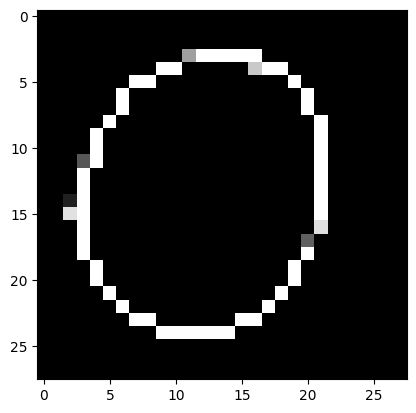

5


<ipython-input-3-41d6f942d873>:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [ ]:
import cv2
import numpy as np

# Load the image (replace 'input_image.png' with your image path)
image_path = '/content/WhatsApp Image 2023-10-26 at 22.15.27_f957a7f1.jpg'
img = cv2.imread(image_path)
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply binary thresholding to the image (adjust the threshold value as needed)
threshold_value = 100  # You can adjust this threshold value
_, binary_img = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

# Resize the binary image to 28x28 pixels (MNIST image size)
binary_img = cv2.resize(binary_img, (28, 28))

# Ensure the data type is consistent with the MNIST dataset (typically uint8)
binary_img = binary_img.astype(np.uint8)

# Invert the binary image
inverted_img = 255 - binary_img

# Resize the inverted image to 28x28 pixels (MNIST image size)
inverted_img = cv2.resize(inverted_img, (28, 28))

# Ensure the data type is consistent with the MNIST dataset (typically uint8)
inverted_img = inverted_img.astype(np.uint8)
print(inverted_img.shape)
# Flatten the 28x28 inverted image to a 1D array
flattened_array = inverted_img.reshape(-1)
print(flattened_array.shape)
import matplotlib.pyplot as plt
plt.imshow(inverted_img, cmap='gray')
plt.show()
#testing
predictions = nn.predict(flattened_array)
prediction=np.argmax(predictions.flatten())
print(prediction)

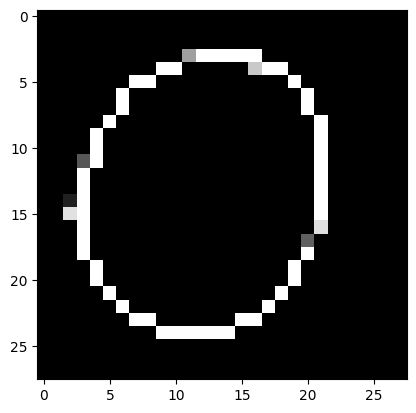

5


<ipython-input-3-41d6f942d873>:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [ ]:
import cv2
import numpy as np

# Load the image (replace 'input_image.png' with your image path)
image_path = '/content/WhatsApp Image 2023-10-26 at 22.15.27_f957a7f1.jpg'
img = cv2.imread(image_path)
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply binary thresholding to the image (adjust the threshold value as needed)
threshold_value = 100  # You can adjust this threshold value
_, binary_img = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

# Resize the binary image to 28x28 pixels (MNIST image size)
binary_img = cv2.resize(binary_img, (28, 28))

# Ensure the data type is consistent with the MNIST dataset (typically uint8)
binary_img = binary_img.astype(np.uint8)

# Invert the binary image
inverted_img = 255 - binary_img

# Resize the inverted image to 28x28 pixels (MNIST image size)
inverted_img = cv2.resize(inverted_img, (28, 28))

# Ensure the data type is consistent with the MNIST dataset (typically uint8)
inverted_img = inverted_img.astype(np.uint8)

# Flatten the 28x28 inverted image to a 1D array
flattened_array = inverted_img.reshape(-1)

import matplotlib.pyplot as plt
plt.imshow(inverted_img, cmap='gray')
plt.show()
#testing
predictions = nn.predict(flattened_array)
prediction=np.argmax(predictions.flatten())
print(prediction)